## This code is to find out the different of each epoch and batch size combination

In [2]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Path_FashionMNIST

In [3]:
'''find the Model path'''
# find the current path
current_path = os.getcwd()
print('The current path is:', current_path)

# find the parent path
parent_path = Path(current_path).parent
print('The parent path is:', parent_path)

# find the data path
# data_path1 = parent_path / 'Data/alexnet/fashion_mnist/'
# data_path2 = parent_path / 'Data/alexnet/cifar100/'
data_path1 = parent_path / 'Data/alexnet_AllLayers/fashion_mnist/'
data_path2 = parent_path / 'Data/alexnet_AllLayers/cifar100/'
print('The data path is:', data_path1)
print('The data path is:', data_path2)

The current path is: /Users/dtjgp/Learning/GreenAI/Cloud/4090/code
The parent path is: /Users/dtjgp/Learning/GreenAI/Cloud/4090
The data path is: /Users/dtjgp/Learning/GreenAI/Cloud/4090/Data/alexnet_AllLayers/fashion_mnist
The data path is: /Users/dtjgp/Learning/GreenAI/Cloud/4090/Data/alexnet_AllLayers/cifar100


### extract data

In [4]:
batch_sizes = [256]
epochs = [20]
rounds = 1

#### read all the data from all the folders

In [5]:
folder_list = []
for epoch in epochs:
    for batch in batch_sizes:
        for round in range(rounds):
            folder_name = 'E' + str(epoch) + '_B' + str(batch) + '_R' + str(round)
            # print('The folder name is:', folder_name)
            folder_list.append(folder_name)
            
# find the folders in the data path
folder1_names = os.listdir(data_path1)
folder2_names = os.listdir(data_path2)
print('The folder names are:', folder1_names, folder2_names)
print('The folder list is:', folder_list)

# find the common folders
common1_folders = list(set(folder_list).intersection(folder1_names))
common2_folders = list(set(folder_list).intersection(folder2_names))
# sort the common folders
common1_folders.sort()
common2_folders.sort()
print('The common folders are:', common1_folders, common2_folders)
# print(len(common_folders))

The folder names are: ['E20_B256_R0'] ['E20_B256_R0']
The folder list is: ['E20_B256_R0']
The common folders are: ['E20_B256_R0'] ['E20_B256_R0']


### analysis data

#### find the data in same epoch and batch size

In [6]:
# read the data from the common folders
data_f = data_path1 / common1_folders[0]
data_c = data_path2 / common2_folders[0]
print('The data folder is:', data_f, data_c)
# find the files in the data folder
files_f = os.listdir(data_f)
files_c = os.listdir(data_c)
print('The files are:', files_f,'\n', files_c)


The data folder is: /Users/dtjgp/Learning/GreenAI/Cloud/4090/Data/alexnet_AllLayers/fashion_mnist/E20_B256_R0 /Users/dtjgp/Learning/GreenAI/Cloud/4090/Data/alexnet_AllLayers/cifar100/E20_B256_R0
The files are: ['Train_time.npy', 'Layers_time.npy', 'Train_part_time.npy', 'Epoch_time.npy', 'Epoch_energy.npy', 'Train_acc.npy', 'Test_acc.npy'] 
 ['Train_time.npy', 'Layers_time.npy', 'Train_part_time.npy', 'Epoch_time.npy', 'Epoch_energy.npy', 'Train_acc.npy', 'Test_acc.npy']


In [7]:
# read all the files in the common folders
LayersTime_f = np.load(data_f / 'Layers_time.npy', allow_pickle=True)
TrainPartTime_f = np.load(data_f / 'Train_part_time.npy', allow_pickle=True)
EpochTime_f = np.load(data_f / 'Epoch_time.npy', allow_pickle=True)
EpochEnergy_f = np.load(data_f / 'Epoch_energy.npy', allow_pickle=True)
TrainAcc_f = np.load(data_f / 'Train_acc.npy', allow_pickle=True)
TestAcc_f = np.load(data_f / 'Test_acc.npy', allow_pickle=True)

LayersTime_c = np.load(data_c / 'Layers_time.npy', allow_pickle=True)
TrainPartTime_c = np.load(data_c / 'Train_part_time.npy', allow_pickle=True)
EpochTime_c = np.load(data_c / 'Epoch_time.npy', allow_pickle=True)
EpochEnergy_c = np.load(data_c / 'Epoch_energy.npy', allow_pickle=True)
TrainAcc_c = np.load(data_c / 'Train_acc.npy', allow_pickle=True)
TestAcc_c = np.load(data_c/ 'Test_acc.npy', allow_pickle=True)

#### LayersTime

In [8]:
# LayersName = ['AdaptiveAvgPool2d', 'Conv2d', 'Dropout', 'Flatten', 'Linear', 'MaxPool2d', 'ReLU']
LayersName = ['Conv1', 'ReLU2', 'MaxP3', 'Conv4', 'ReLU5', 'MaxP6', 'Conv7', 'ReLU8', 'Conv9', 'ReLU10', 'Conv11', 'ReLU12', 'MaxP13', 'Adap14', 'Flat15', 'Line16', 'ReLU17', 'Drop18', 'Line19', 'ReLU20', 'Drop21', 'Line22']
print(f'The lenth of the LayersName is {len(LayersName)}')

The lenth of the LayersName is 22


##### fashionMNIST

In [15]:
print(f'The shape of the LayersTime_f is {LayersTime_f.shape}')
LayerSort = ['AdaptiveAvgPool2d', 'Conv2d', 'Dropout', 'Flatten', 'Linear', 'MaxPool2d', 'ReLU']
LayerSortData_f = np.zeros((len(LayerSort), LayersTime_f.shape[1]))
for epoch in range(LayersTime_f.shape[1]):
    for i in range(len(LayersName)):
        layernamei = LayersName[i]
        if "Conv" in layernamei:
            LayerSortData_f[1, epoch] += LayersTime_f[i, epoch]
        elif "ReLU" in layernamei:
            LayerSortData_f[6, epoch] += LayersTime_f[i, epoch]
        elif "MaxP" in layernamei:
            LayerSortData_f[5, epoch] += LayersTime_f[i, epoch]
        elif "Adap" in layernamei:
            LayerSortData_f[0, epoch] += LayersTime_f[i, epoch]
        elif "Flat" in layernamei:
            LayerSortData_f[3, epoch] += LayersTime_f[i, epoch]
        elif "Line" in layernamei:
            LayerSortData_f[4, epoch] += LayersTime_f[i, epoch]
        elif "Drop" in layernamei:
            LayerSortData_f[2, epoch] += LayersTime_f[i, epoch]
print(f'The shape of the LayerSortData is {LayerSortData_f.shape}')

The shape of the LayersTime_f is (22, 20)
The shape of the LayerSortData is (7, 20)


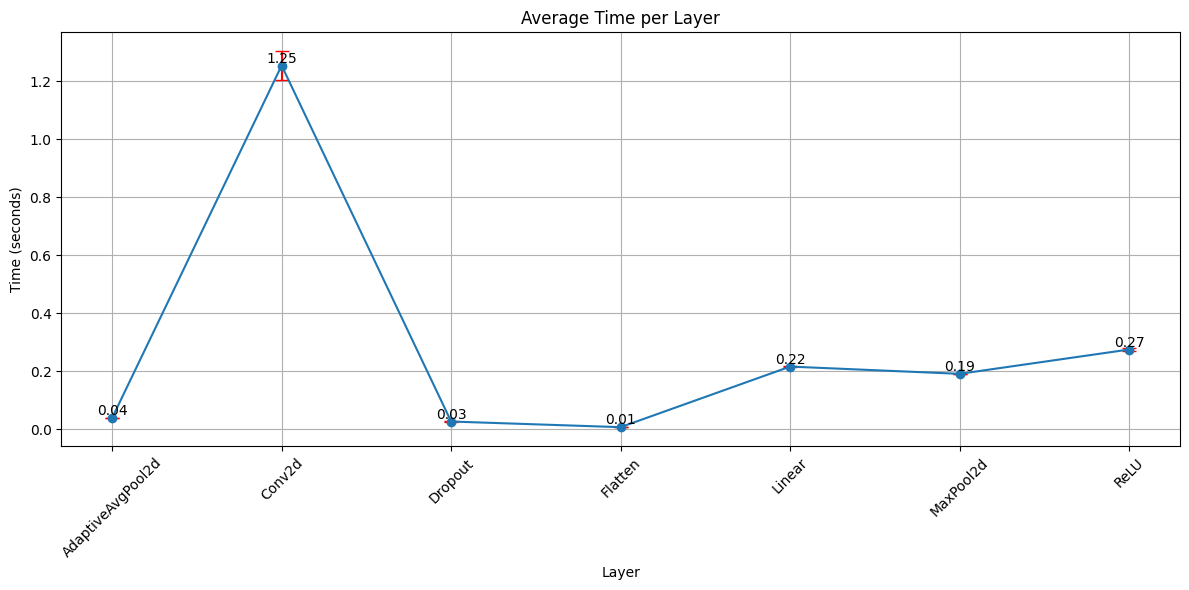

In [19]:
# Calculate the mean and standard deviation for each layer
layer_means = np.mean(LayerSortData_f, axis=1)
layer_stds = np.std(LayerSortData_f, axis=1)

# Plot the average time per layer with error bars
plt.figure(figsize=(12, 6))
plt.errorbar(LayerSort, layer_means, yerr=layer_stds, fmt='-o', ecolor='r', capsize=5)
plt.title('Average Time per Layer')
plt.xlabel('Layer')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# add the value on each point in the plot
for i in range(len(LayerSort)):
    plt.text(i, layer_means[i], np.round(layer_means[i], 2), ha='center', va='bottom')
plt.show()

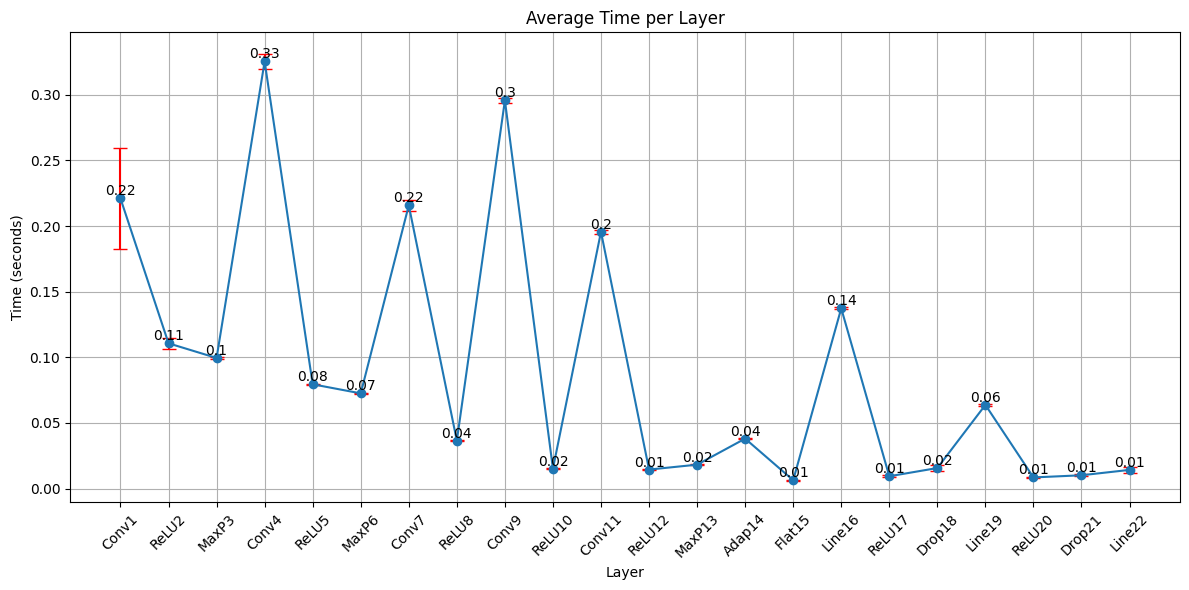

In [12]:
# Calculate the mean and standard deviation for each layer
layer_means = np.mean(LayersTime_f, axis=1)
layer_stds = np.std(LayersTime_f, axis=1)

# Plot the average time per layer with error bars
plt.figure(figsize=(12, 6))
plt.errorbar(LayersName, layer_means, yerr=layer_stds, fmt='-o', ecolor='r', capsize=5)
plt.title('Average Time per Layer')
plt.xlabel('Layer')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# add the value on each point in the plot
for i in range(len(LayersName)):
    plt.text(i, layer_means[i], np.round(layer_means[i], 2), ha='center', va='bottom')
plt.show()

##### cifar100

In [20]:
LayerSortData_c = np.zeros((len(LayerSort), LayersTime_c.shape[1]))
for epoch in range(LayersTime_c.shape[1]):
    for i in range(len(LayersName)):
        layernamei = LayersName[i]
        if "Conv" in layernamei:
            LayerSortData_c[1, epoch] += LayersTime_c[i, epoch]
        elif "ReLU" in layernamei:
            LayerSortData_c[6, epoch] += LayersTime_c[i, epoch]
        elif "MaxP" in layernamei:
            LayerSortData_c[5, epoch] += LayersTime_c[i, epoch]
        elif "Adap" in layernamei:
            LayerSortData_c[0, epoch] += LayersTime_c[i, epoch]
        elif "Flat" in layernamei:
            LayerSortData_c[3, epoch] += LayersTime_c[i, epoch]
        elif "Line" in layernamei:
            LayerSortData_c[4, epoch] += LayersTime_c[i, epoch]
        elif "Drop" in layernamei:
            LayerSortData_c[2, epoch] += LayersTime_c[i, epoch]
print(f'The shape of the LayerSortData is {LayerSortData_c.shape}')

The shape of the LayerSortData is (7, 20)


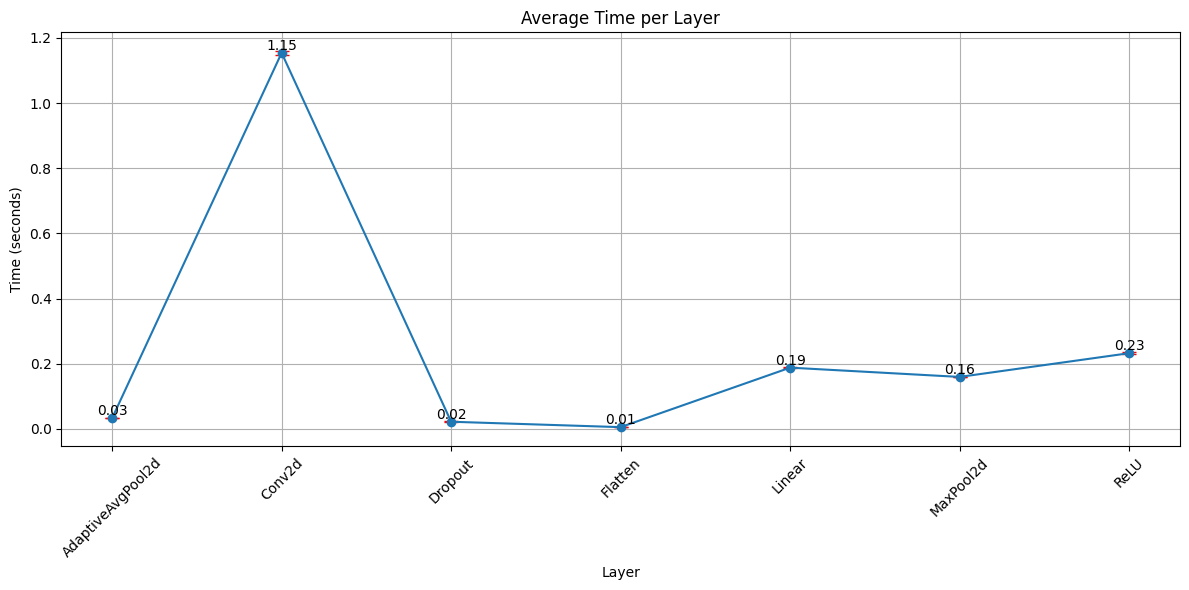

In [21]:
# Calculate the mean and standard deviation for each layer
layer_means = np.mean(LayerSortData_c, axis=1)
layer_stds = np.std(LayerSortData_c, axis=1)

# Plot the average time per layer with error bars
plt.figure(figsize=(12, 6))
plt.errorbar(LayerSort, layer_means, yerr=layer_stds, fmt='-o', ecolor='r', capsize=5)
plt.title('Average Time per Layer')
plt.xlabel('Layer')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# add the value on each point in the plot
for i in range(len(LayerSort)):
    plt.text(i, layer_means[i], np.round(layer_means[i], 2), ha='center', va='bottom')
plt.show()

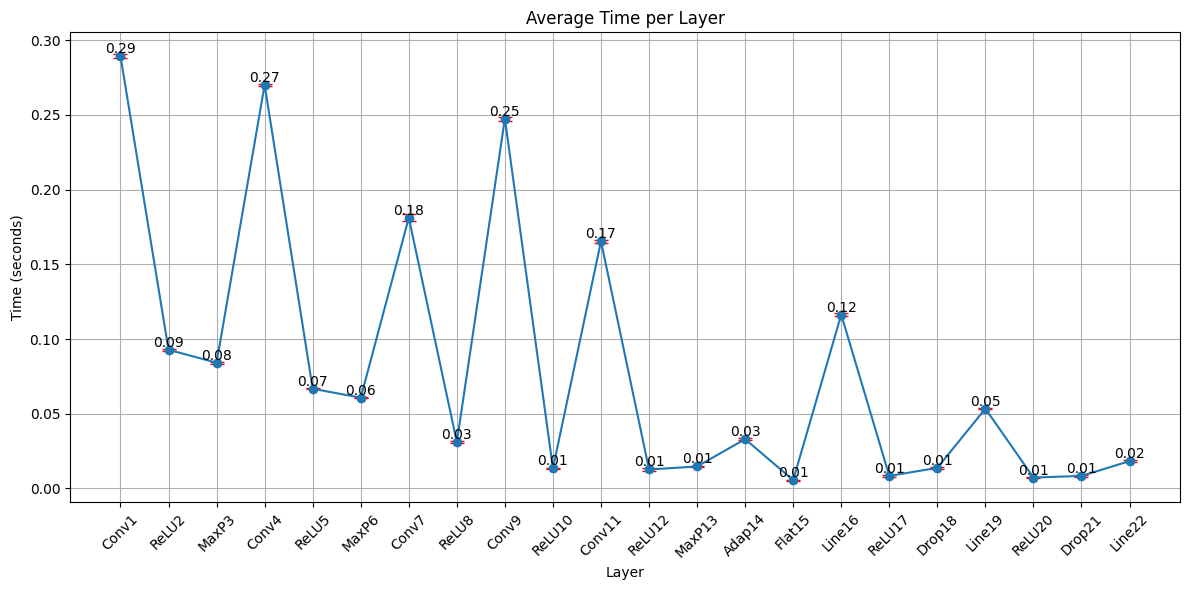

In [13]:
# Calculate the mean and standard deviation for each layer
layer_means = np.mean(LayersTime_c, axis=1)
layer_stds = np.std(LayersTime_c, axis=1)

# Plot the average time per layer with error bars
plt.figure(figsize=(12, 6))
plt.errorbar(LayersName, layer_means, yerr=layer_stds, fmt='-o', ecolor='r', capsize=5)
plt.title('Average Time per Layer')
plt.xlabel('Layer')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# add the value on each point in the plot
for i in range(len(LayersName)):
    plt.text(i, layer_means[i], np.round(layer_means[i], 2), ha='center', va='bottom')
plt.show()

#### TrainPartTime

In [14]:
TrainPartName = ['TimeToDevice', 'Forward', 'Loss', 'Backward', 'Optimization', 'Test']

##### fashionMNIST

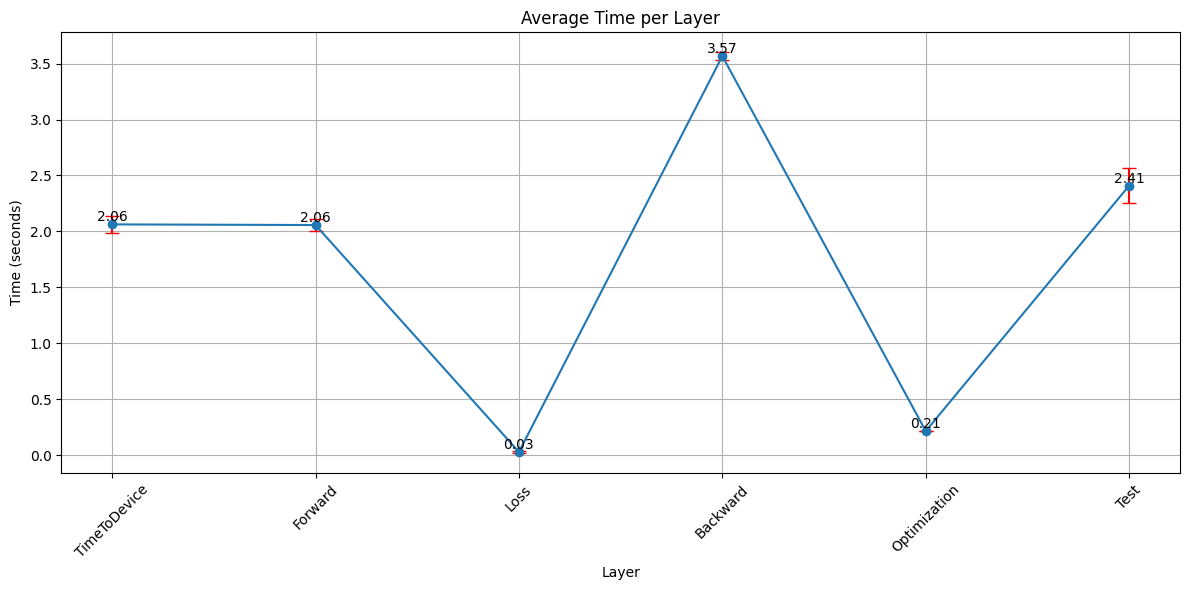

In [15]:
# Calculate the mean and standard deviation for each layer
trainpart_means = np.mean(TrainPartTime_f, axis=1)
trainpart_stds = np.std(TrainPartTime_f, axis=1)

# Plot the average time per layer with error bars
plt.figure(figsize=(12, 6))
plt.errorbar(TrainPartName, trainpart_means, yerr=trainpart_stds, fmt='-o', ecolor='r', capsize=5)
plt.title('Average Time per Layer')
plt.xlabel('Layer')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# add the value on each point in the plot
for i in range(len(TrainPartName)):
    plt.text(i, trainpart_means[i], np.round(trainpart_means[i], 2), ha='center', va='bottom')
plt.show()

##### cifar100

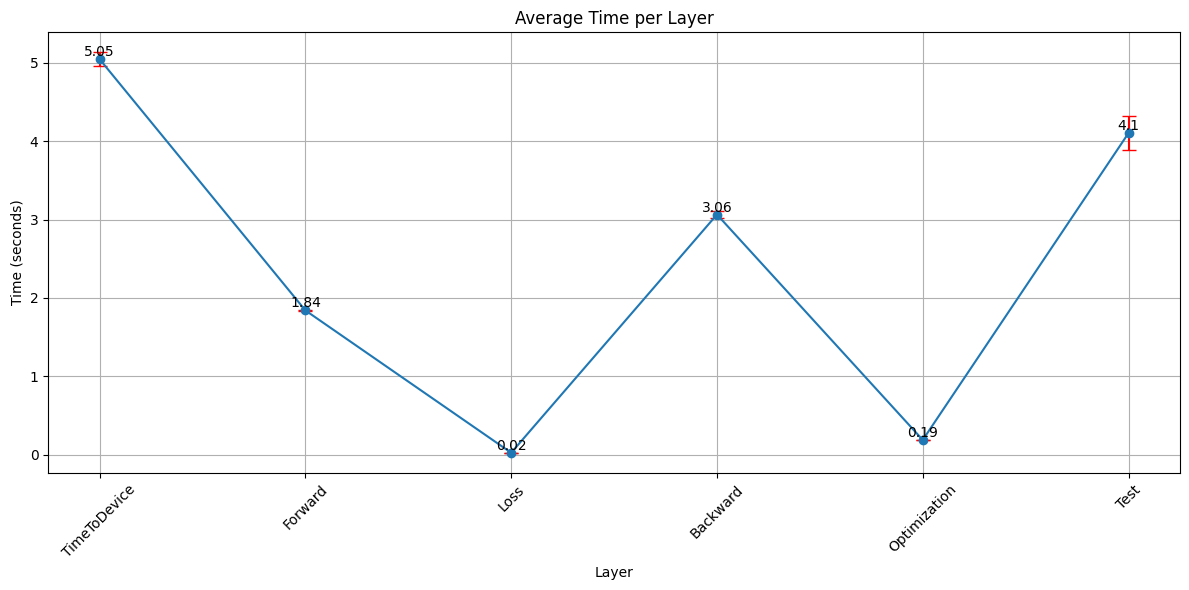

In [16]:
# Calculate the mean and standard deviation for each layer
trainpart_means = np.mean(TrainPartTime_c, axis=1)
trainpart_stds = np.std(TrainPartTime_c, axis=1)

# Plot the average time per layer with error bars
plt.figure(figsize=(12, 6))
plt.errorbar(TrainPartName, trainpart_means, yerr=trainpart_stds, fmt='-o', ecolor='r', capsize=5)
plt.title('Average Time per Layer')
plt.xlabel('Layer')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# add the value on each point in the plot
for i in range(len(TrainPartName)):
    plt.text(i, trainpart_means[i], np.round(trainpart_means[i], 2), ha='center', va='bottom')
plt.show()

#### EpochEnergy

##### fashionMNIST

In [17]:
totalEpochEnergy_f = np.zeros((1, epochs[0]))
avgEpochEnergy_f = np.zeros((1, epochs[0]))
print('The total energy is:', totalEpochEnergy_f.shape, avgEpochEnergy_f.shape)

The total energy is: (1, 20) (1, 20)


In [18]:
for i in range(EpochEnergy_f.shape[0]):
    Energy_epoch = EpochEnergy_f[i][0]
    # print(Energy_epoch)
    totalEnergy_epoch_f = np.sum(Energy_epoch)
    avgEpochEnergy_epoch_f = np.mean(Energy_epoch)
    totalEnergy_epoch_f = np.round(totalEnergy_epoch_f, 2)
    avgEpochEnergy_epoch_f = np.round(avgEpochEnergy_epoch_f, 2)
    totalEpochEnergy_f[0,i] = totalEnergy_epoch_f
    avgEpochEnergy_f[0,i] = avgEpochEnergy_epoch_f
print(f'The total energy per epoch is: {totalEpochEnergy_f}')
print(f'The average energy per epoch is: {avgEpochEnergy_f}')

The total energy per epoch is: [[2513.96 2576.49 2585.15 2578.64 2615.55 2613.81 2621.81 2648.48 2698.3
  2616.82 2709.94 2676.93 2628.94 2636.72 2620.31 2616.8  2630.17 2690.7
  2635.9  2624.48]]
The average energy per epoch is: [[167.6  184.04 184.65 184.19 186.82 186.7  187.27 189.18 179.89 186.92
  180.66 178.46 187.78 188.34 187.17 186.91 187.87 179.38 188.28 187.46]]


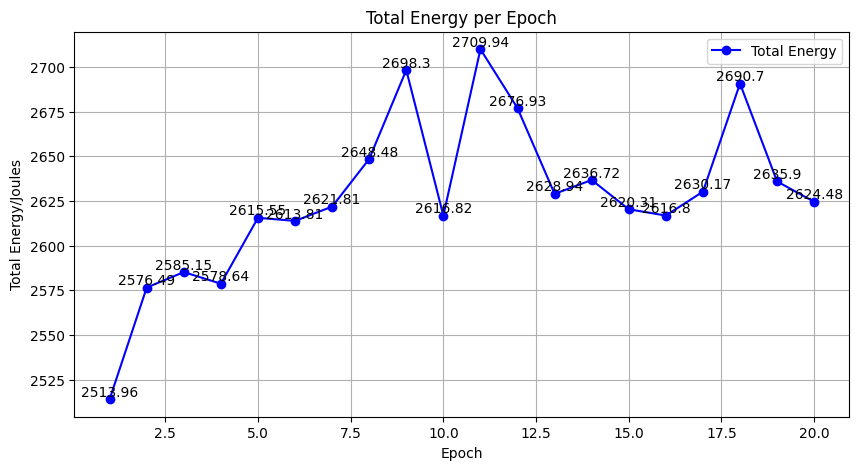

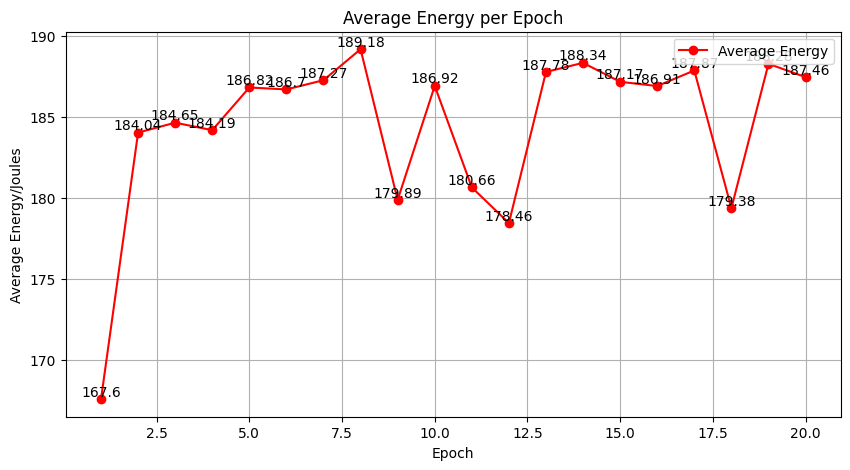

In [19]:
epoch_list = np.arange(1, epochs[0]+1)

# Plotting the total energy per epoch
plt.figure(figsize=(10, 5))
plt.plot(epoch_list, totalEpochEnergy_f.reshape(-1,), marker='o', linestyle='-', color='b', label='Total Energy')
plt.title('Total Energy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Total Energy/Joules')
plt.grid(True)
plt.legend()
# plot the value on each point
for i in range(len(epoch_list)):
    plt.text(epoch_list[i], totalEpochEnergy_f[0,i], totalEpochEnergy_f[0,i], ha='center', va='bottom')
plt.show()

# Plotting the average energy per epoch
plt.figure(figsize=(10, 5))
plt.plot(epoch_list, avgEpochEnergy_f.reshape(-1,), marker='o', linestyle='-', color='r', label='Average Energy')
plt.title('Average Energy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Average Energy/Joules')
plt.grid(True)
plt.legend()
# plot the value on each point
for i in range(len(epoch_list)):
    plt.text(epoch_list[i], avgEpochEnergy_f[0,i], avgEpochEnergy_f[0,i], ha='center', va='bottom')
plt.show()

In [20]:
# print(len(epoch_list), len(avgEpochEnergy_f.reshape(-1,)))
AvgTotalEnergyEpoch = np.mean(totalEpochEnergy_f.reshape(-1,))
StdEnergyEpoch = np.std(totalEpochEnergy_f.reshape(-1,))
print(f'The average energy per epoch is: {AvgTotalEnergyEpoch}, the standard deviation is: {StdEnergyEpoch}')

The average energy per epoch is: 2626.995, the standard deviation is: 44.25637055837272


In [21]:
# print(len(epoch_list), len(avgEpochEnergy_f.reshape(-1,)))
AvgEnergyEpoch = np.mean(avgEpochEnergy_f.reshape(-1,))
StdEnergyEpoch = np.std(avgEpochEnergy_f.reshape(-1,))
print(f'The average energy per epoch is: {AvgEnergyEpoch}, the standard deviation is: {StdEnergyEpoch}')

The average energy per epoch is: 184.4785, the standard deviation is: 5.01560891118915


##### cifar100 

In [22]:
totalEpochEnergy_c = np.zeros((1, epochs[0]))
avgEpochEnergy_c = np.zeros((1, epochs[0]))
print('The total energy is:', totalEpochEnergy_c.shape, avgEpochEnergy_c.shape)

The total energy is: (1, 20) (1, 20)


In [23]:
for i in range(EpochEnergy_c.shape[0]):
    Energy_epoch = EpochEnergy_c[i][0]
    # print(Energy_epoch)
    totalEnergy_epoch_c = np.sum(Energy_epoch)
    avgEpochEnergy_epoch_c = np.mean(Energy_epoch)
    totalEnergy_epoch_c = np.round(totalEnergy_epoch_c, 2)
    avgEpochEnergy_epoch_c = np.round(avgEpochEnergy_epoch_c, 2)
    totalEpochEnergy_c[0,i] = totalEnergy_epoch_c
    avgEpochEnergy_c[0,i] = avgEpochEnergy_epoch_c
print(f'The total energy per epoch is: {totalEpochEnergy_c}')
print(f'The average energy per epoch is: {avgEpochEnergy_c}')

The total energy per epoch is: [[2972.11 2850.58 2936.79 2918.67 2940.82 2980.61 2995.13 2964.55 3025.61
  3068.32 3080.65 3013.6  3012.84 3015.77 3013.55 2986.04 2993.59 2985.44
  3011.11 2946.08]]
The average energy per epoch is: [[123.84 135.74 133.49 132.67 133.67 135.48 136.14 134.75 137.53 139.47
  140.03 136.98 136.95 137.08 136.98 135.73 136.07 135.7  136.87 133.91]]


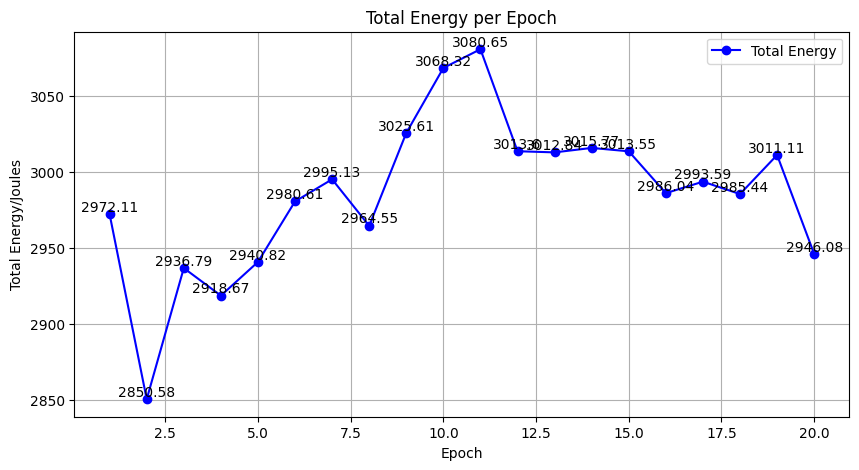

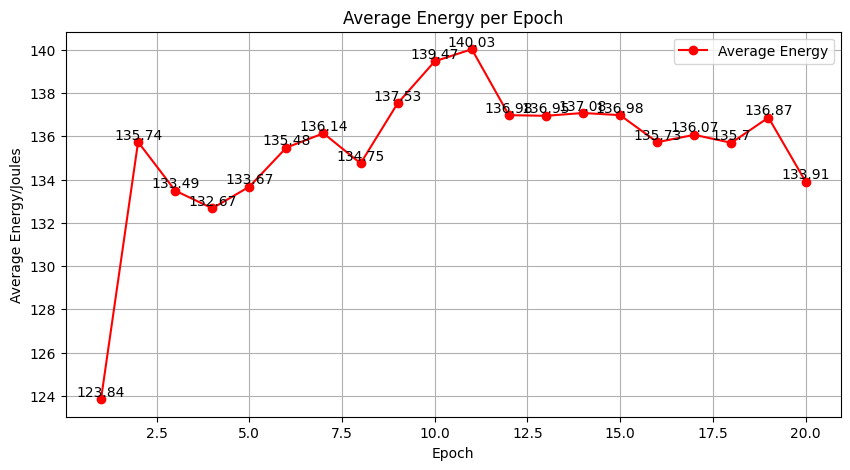

In [24]:
epoch_list = np.arange(1, epochs[0]+1)

# Plotting the total energy per epoch
plt.figure(figsize=(10, 5))
plt.plot(epoch_list, totalEpochEnergy_c.reshape(-1,), marker='o', linestyle='-', color='b', label='Total Energy')
plt.title('Total Energy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Total Energy/Joules')
plt.grid(True)
plt.legend()
# plot the value on each point
for i in range(len(epoch_list)):
    plt.text(epoch_list[i], totalEpochEnergy_c[0,i], np.round(totalEpochEnergy_c[0,i], 2), ha='center', va='bottom')
plt.show()

# Plotting the average energy per epoch
plt.figure(figsize=(10, 5))
plt.plot(epoch_list, avgEpochEnergy_c.reshape(-1,), marker='o', linestyle='-', color='r', label='Average Energy')
plt.title('Average Energy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Average Energy/Joules')
plt.grid(True)
plt.legend()
# plot the value on each point
for i in range(len(epoch_list)):
    plt.text(epoch_list[i], avgEpochEnergy_c[0,i], np.round(avgEpochEnergy_c[0,i], 2), ha='center', va='bottom')
plt.show()

#### EpochTime

##### fashionMNIST

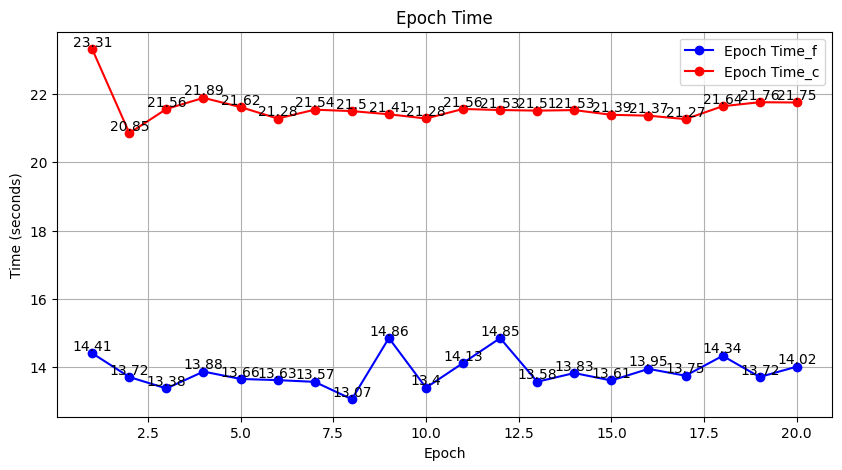

In [25]:
# plot the EpochTime_f and EpochTime_c
epoch_list = np.arange(1, epochs[0]+1)
plt.figure(figsize=(10, 5))
plt.plot(epoch_list, EpochTime_f.reshape(-1,), marker='o', linestyle='-', color='b', label='Epoch Time_f')
plt.plot(epoch_list, EpochTime_c.reshape(-1,), marker='o', linestyle='-', color='r', label='Epoch Time_c')
plt.title('Epoch Time')
plt.xlabel('Epoch')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.legend()
# plot the value on each point
for i in range(len(epoch_list)):
    plt.text(epoch_list[i], EpochTime_f[i], np.round(EpochTime_f[i], 2), ha='center', va='bottom')
    plt.text(epoch_list[i], EpochTime_c[i], np.round(EpochTime_c[i], 2), ha='center', va='bottom')
plt.show()

In [26]:
EpochTime_f

array([14.41113901, 13.71627903, 13.38076973, 13.87523627, 13.65962124,
       13.62526131, 13.57460237, 13.06627965, 14.85715723, 13.40270638,
       14.12751603, 14.85430956, 13.5779891 , 13.83288264, 13.61443877,
       13.9546144 , 13.75417686, 14.33566165, 13.71711707, 14.01986885])

##### cifar100

In [27]:
EpochTime_c

array([23.31131434, 20.85488629, 21.56214833, 21.88804197, 21.61729407,
       21.2825315 , 21.54135728, 21.50055242, 21.40684724, 21.28375053,
       21.56225872, 21.53185892, 21.51383972, 21.52968454, 21.39168382,
       21.36610198, 21.26553845, 21.64295578, 21.75954628, 21.75248599])